In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

plt.style.use("seaborn-whitegrid")

C:\Users\Laucha\AppData\Local\Temp\ipykernel_4568\1823542300.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


In [2]:
data = pd.read_csv('Argos_UK_Scraped_Product_Info-Batch2.csv', encoding='cp1252', index_col=[0])
data.shape

(6754, 7)

In [3]:
data = data.rename(columns={'Sub-Cateogry':'Sub-Category'})
data

,Category,Sub-Category,Product Type,Product Line,Product Line Item,Product Price,EAN Code
0,Home and furniture,Bedroom furniture,Chest of drawers,NaN,Habitat Simone 2 + 2 Drawer Rattan Chest,£230.00,NaN
1,Home and furniture,Bedroom furniture,Chest of drawers,NaN,Habitat Kirk 3 Drawer Chest - Oak,£295.00,NaN
2,Home and furniture,Bedroom furniture,Chest of drawers,NaN,Habitat Kirk 3 Drawer Chest - Oak,£295.00,NaN
3,Home and furniture,Bedroom furniture,Chest of drawers,NaN,Habitat Kirk 3 Drawer Chest - Walnut,£295.00,NaN
4,Home and furniture,Bedroom furniture,Chest of drawers,NaN,Habitat Simone 2 + 2 Wide Drawer Rattan Chest,£300.00,NaN
...,...,...,...,...,...,...,...
6749,Home and furniture,Bedroom furniture,Wardrobes,NaN,Habitat Holsted Large White & Mirror Sliding W...,£450.00,NaN
6750,Home and furniture,Bedroom furniture,Wardrobes,NaN,Habitat Holsted Large Mirror Sliding Wardrobe ...,£450.00,NaN
6751,Home and furniture,Bedroom furniture,Wardrobes,NaN,Habitat Holsted White Extra Large Wardrobe,£450.00,NaN
6752,Home and furniture,Bedroom furniture,Wardrobes,NaN,Habitat Holsted White Extra Large Wardrobe,£450.00,NaN


# Data Wrangling

In [4]:
#Checking NA values
data.isnull().sum()

Category                0
Sub-Category            0
Product Type            0
Product Line         5987
Product Line Item       0
Product Price           0
EAN Code             3677
dtype: int64

In [5]:
#Checking NA values as percentage
data.isnull().sum()/len(data)*100

Category              0.000000
Sub-Category          0.000000
Product Type          0.000000
Product Line         88.643767
Product Line Item     0.000000
Product Price         0.000000
EAN Code             54.441812
dtype: float64

In [6]:
#Getting rid of EAN Code, Product Line
df = data.drop(['Product Line', 'EAN Code'], axis=1)

In [7]:
#Checking data types
df.dtypes

Category             object
Sub-Category         object
Product Type         object
Product Line Item    object
Product Price        object
dtype: object

In [8]:
#Discover that there where several values with this format
df[df['Product Price'].str.contains("px")]

,Category,Sub-Category,Product Type,Product Line Item,Product Price
283,Home and furniture,Bedroom furniture,Chest of drawers,Hatfield 3+3 Drawer Chest - White Gloss,£333.00.cxdAxO{padding:15px;border-bottom:1px
284,Home and furniture,Bedroom furniture,Chest of drawers,Hatfield 3+3 Drawer Chest - White Gloss,£333.00.cxdAxO{padding:15px;border-bottom:1px
285,Home and furniture,Bedroom furniture,Chest of drawers,Hatfield 3+3 Drawer Chest - Dark Grey Gloss,£333.00.cxdAxO{padding:15px;border-bottom:1px
286,Home and furniture,Bedroom furniture,Chest of drawers,Hatfield 4 Drawer Chest - Dark Grey Gloss,£270.00.cxdAxO{padding:15px;border-bottom:1px
287,Home and furniture,Bedroom furniture,Chest of drawers,Hatfield 4 Drawer Chest - Dark Grey Gloss,£270.00.cxdAxO{padding:15px;border-bottom:1px
288,Home and furniture,Bedroom furniture,Chest of drawers,Hatfield 4 Drawer Chest - White Gloss,£270.00.cxdAxO{padding:15px;border-bottom:1px
291,Home and furniture,Bedroom furniture,Chest of drawers,Hatfield 3 Door Mirror Wardrobe - Grey Gloss,£540.00.cxdAxO{padding:15px;border-bottom:1px
505,Home and furniture,Bedroom furniture,Bedside tables,Hatfield 2 Drawer Bedside Table - Grey Gloss,£144.00.hBIIXv{overflow:hidden;max-height:0px;...
506,Home and furniture,Bedroom furniture,Bedside tables,Hatfield 2 Drawer Bedside Table - White Gloss,£144.00.hBIIXv{overflow:hidden;max-height:0px;...
893,Home and furniture,Living room furniture,Sofas,.fcBozu{display:-webkit-box;display:-webkit-fl...,£808.00.iJATTi{padding:15px;border-bottom:1px


In [9]:
#Creating a list to get rid of them
format_error = df[df['Product Price'].str.contains("px")].index.to_list()
#Removing them from the dataset
df.drop(index=format_error, axis=0, inplace=True)

In [10]:
#Convert Price column object type to numeric type
df['Product Price'] = df['Product Price'].str.replace('£','')
df['Product Price'] = pd.to_numeric(df['Product Price'])

In [11]:
df.dtypes

Category              object
Sub-Category          object
Product Type          object
Product Line Item     object
Product Price        float64
dtype: object

# EDA

In [12]:
df.shape

(6744, 5)

In [13]:
df["Category"].unique()

array(['Home and furniture', 'Home', 'Baby and nursery', 'Gifts',
       'Garden and DIY', 'Sports and leisure', 'Clothing', 'Technology',
       'Appliances'], dtype=object)

In [14]:
df.groupby(['Category', 'Sub-Category']).agg(['mean', 'min', 'max'],numeric_only=True)

C:\Users\Laucha\AppData\Local\Temp\ipykernel_4568\2484700252.py:1: FutureWarning: ['Product Type', 'Product Line Item'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby(['Category', 'Sub-Category']).agg(['mean', 'min', 'max'],numeric_only=True)


Product Price  \
                                                                               mean   
Category           Sub-Category                                                       
Appliances         Vacuum cleaners and floorcare                         191.300000   
Baby and nursery   Cot and cot bed mattresses                            151.350649   
                   Cot and crib bedding                                   14.275862   
                   Cots and cot beds                                     231.393939   
                   Cribs and moses baskets                               130.825000   
                   Nursery furniture                                     462.096491   
Clothing           Girls                                                  30.000000   
                   Mens                                                   40.000000   
                   Womens                                                 30.000000   
Garden and DIY     Garden furniture                                      359.953766   
Gifts              Gifts for babies                                       20.000000   
                   Gifts for her                                         465.666667   
                   Novelty gifts                                          10.000000   
Home               Argos Home Moda Compact 2 Seater Faux Leather S...    250.000000   
                   My Little Pony Rainbow Print Kids Bedding Set -...     12.000000   
                   Rendlesham 3 Drawer Bedside Table - White             205.000000   
                   The Elf on the Shelf Red & White Kids Bedding S...     14.000000   
Home and furniture Bathroom furniture                                     62.400000   
                   Bedding                                                24.260063   
                   Bedroom furniture                                     277.918886   
                   Blinds and curtains                                    26.542857   
                   Dining room furniture                                  23.666667   
                   Home furnishings                                       42.247308   
                   Kids room                                             209.415554   
                   Kitchen storage                                        76.250000   
                   Lighting                                               35.967107   
                   Living room furniture                                 616.342107   
                   Office furniture                                      100.000000   
                   Pet supplies                                           18.572941   
                   Storage and organisation                              122.185507   
Sports and leisure Camping and caravanning                                76.818182   
                   Fitness and activity trackers                         131.998571   
                   Hobbies and crafts                                     22.000000   
Technology         Camera accessories                                     34.990000   
                   Mobile phones and accessories                         457.432689   
                   Smart home technology                                 176.528462   

                                                                               \
                                                                          min   
Category           Sub-Category                                                 
Appliances         Vacuum cleaners and floorcare                        80.00   
Baby and nursery   Cot and cot bed mattresses                           22.00   
                   Cot and crib bedding                                  7.00   
                   Cots and cot beds                                    40.00   
                   Cribs and moses baskets                              10.50   
                   Nursery f

In [15]:
#Analyzing Home furniture
home_furniture = df[df['Category'] == 'Home and furniture']
home_furniture

,Category,Sub-Category,Product Type,Product Line Item,Product Price
0,Home and furniture,Bedroom furniture,Chest of drawers,Habitat Simone 2 + 2 Drawer Rattan Chest,230.0
1,Home and furniture,Bedroom furniture,Chest of drawers,Habitat Kirk 3 Drawer Chest - Oak,295.0
2,Home and furniture,Bedroom furniture,Chest of drawers,Habitat Kirk 3 Drawer Chest - Oak,295.0
3,Home and furniture,Bedroom furniture,Chest of drawers,Habitat Kirk 3 Drawer Chest - Walnut,295.0
4,Home and furniture,Bedroom furniture,Chest of drawers,Habitat Simone 2 + 2 Wide Drawer Rattan Chest,300.0
...,...,...,...,...,...
6749,Home and furniture,Bedroom furniture,Wardrobes,Habitat Holsted Large White & Mirror Sliding W...,450.0
6750,Home and furniture,Bedroom furniture,Wardrobes,Habitat Holsted Large Mirror Sliding Wardrobe ...,450.0
6751,Home and furniture,Bedroom furniture,Wardrobes,Habitat Holsted White Extra Large Wardrobe,450.0
6752,Home and furniture,Bedroom furniture,Wardrobes,Habitat Holsted White Extra Large Wardrobe,450.0


In [16]:
home_furniture['Sub-Category'].value_counts()

Living room furniture       1737
Lighting                     961
Bedding                      956
Bedroom furniture            826
Kids room                    542
Storage and organisation     345
Home furnishings             156
Pet supplies                  34
Blinds and curtains            7
Bathroom furniture             5
Kitchen storage                4
Dining room furniture          3
Office furniture               2
Name: Sub-Category, dtype: int64

### Analizing Home Furniture Sub-Category

In [17]:
#Creating a DF that contains all home furniture splitted by sub-category
category = []

for sc in home_furniture['Sub-Category'].unique():
    results = home_furniture[home_furniture['Sub-Category'] == sc]['Product Type'].value_counts().to_frame()
    results = results.reset_index(names=sc+' category')
    category.append(results)

category[0]

,Bedroom furniture category,Product Type
0,Chest of drawers,301
1,Bedside tables,226
2,Bedroom furniture sets,100
3,Beds,95
4,Dressing tables,44
5,Wardrobes,40
6,Mattresses,17
7,Clothes rails and canvas wardrobes,2
8,Overbed storage,1


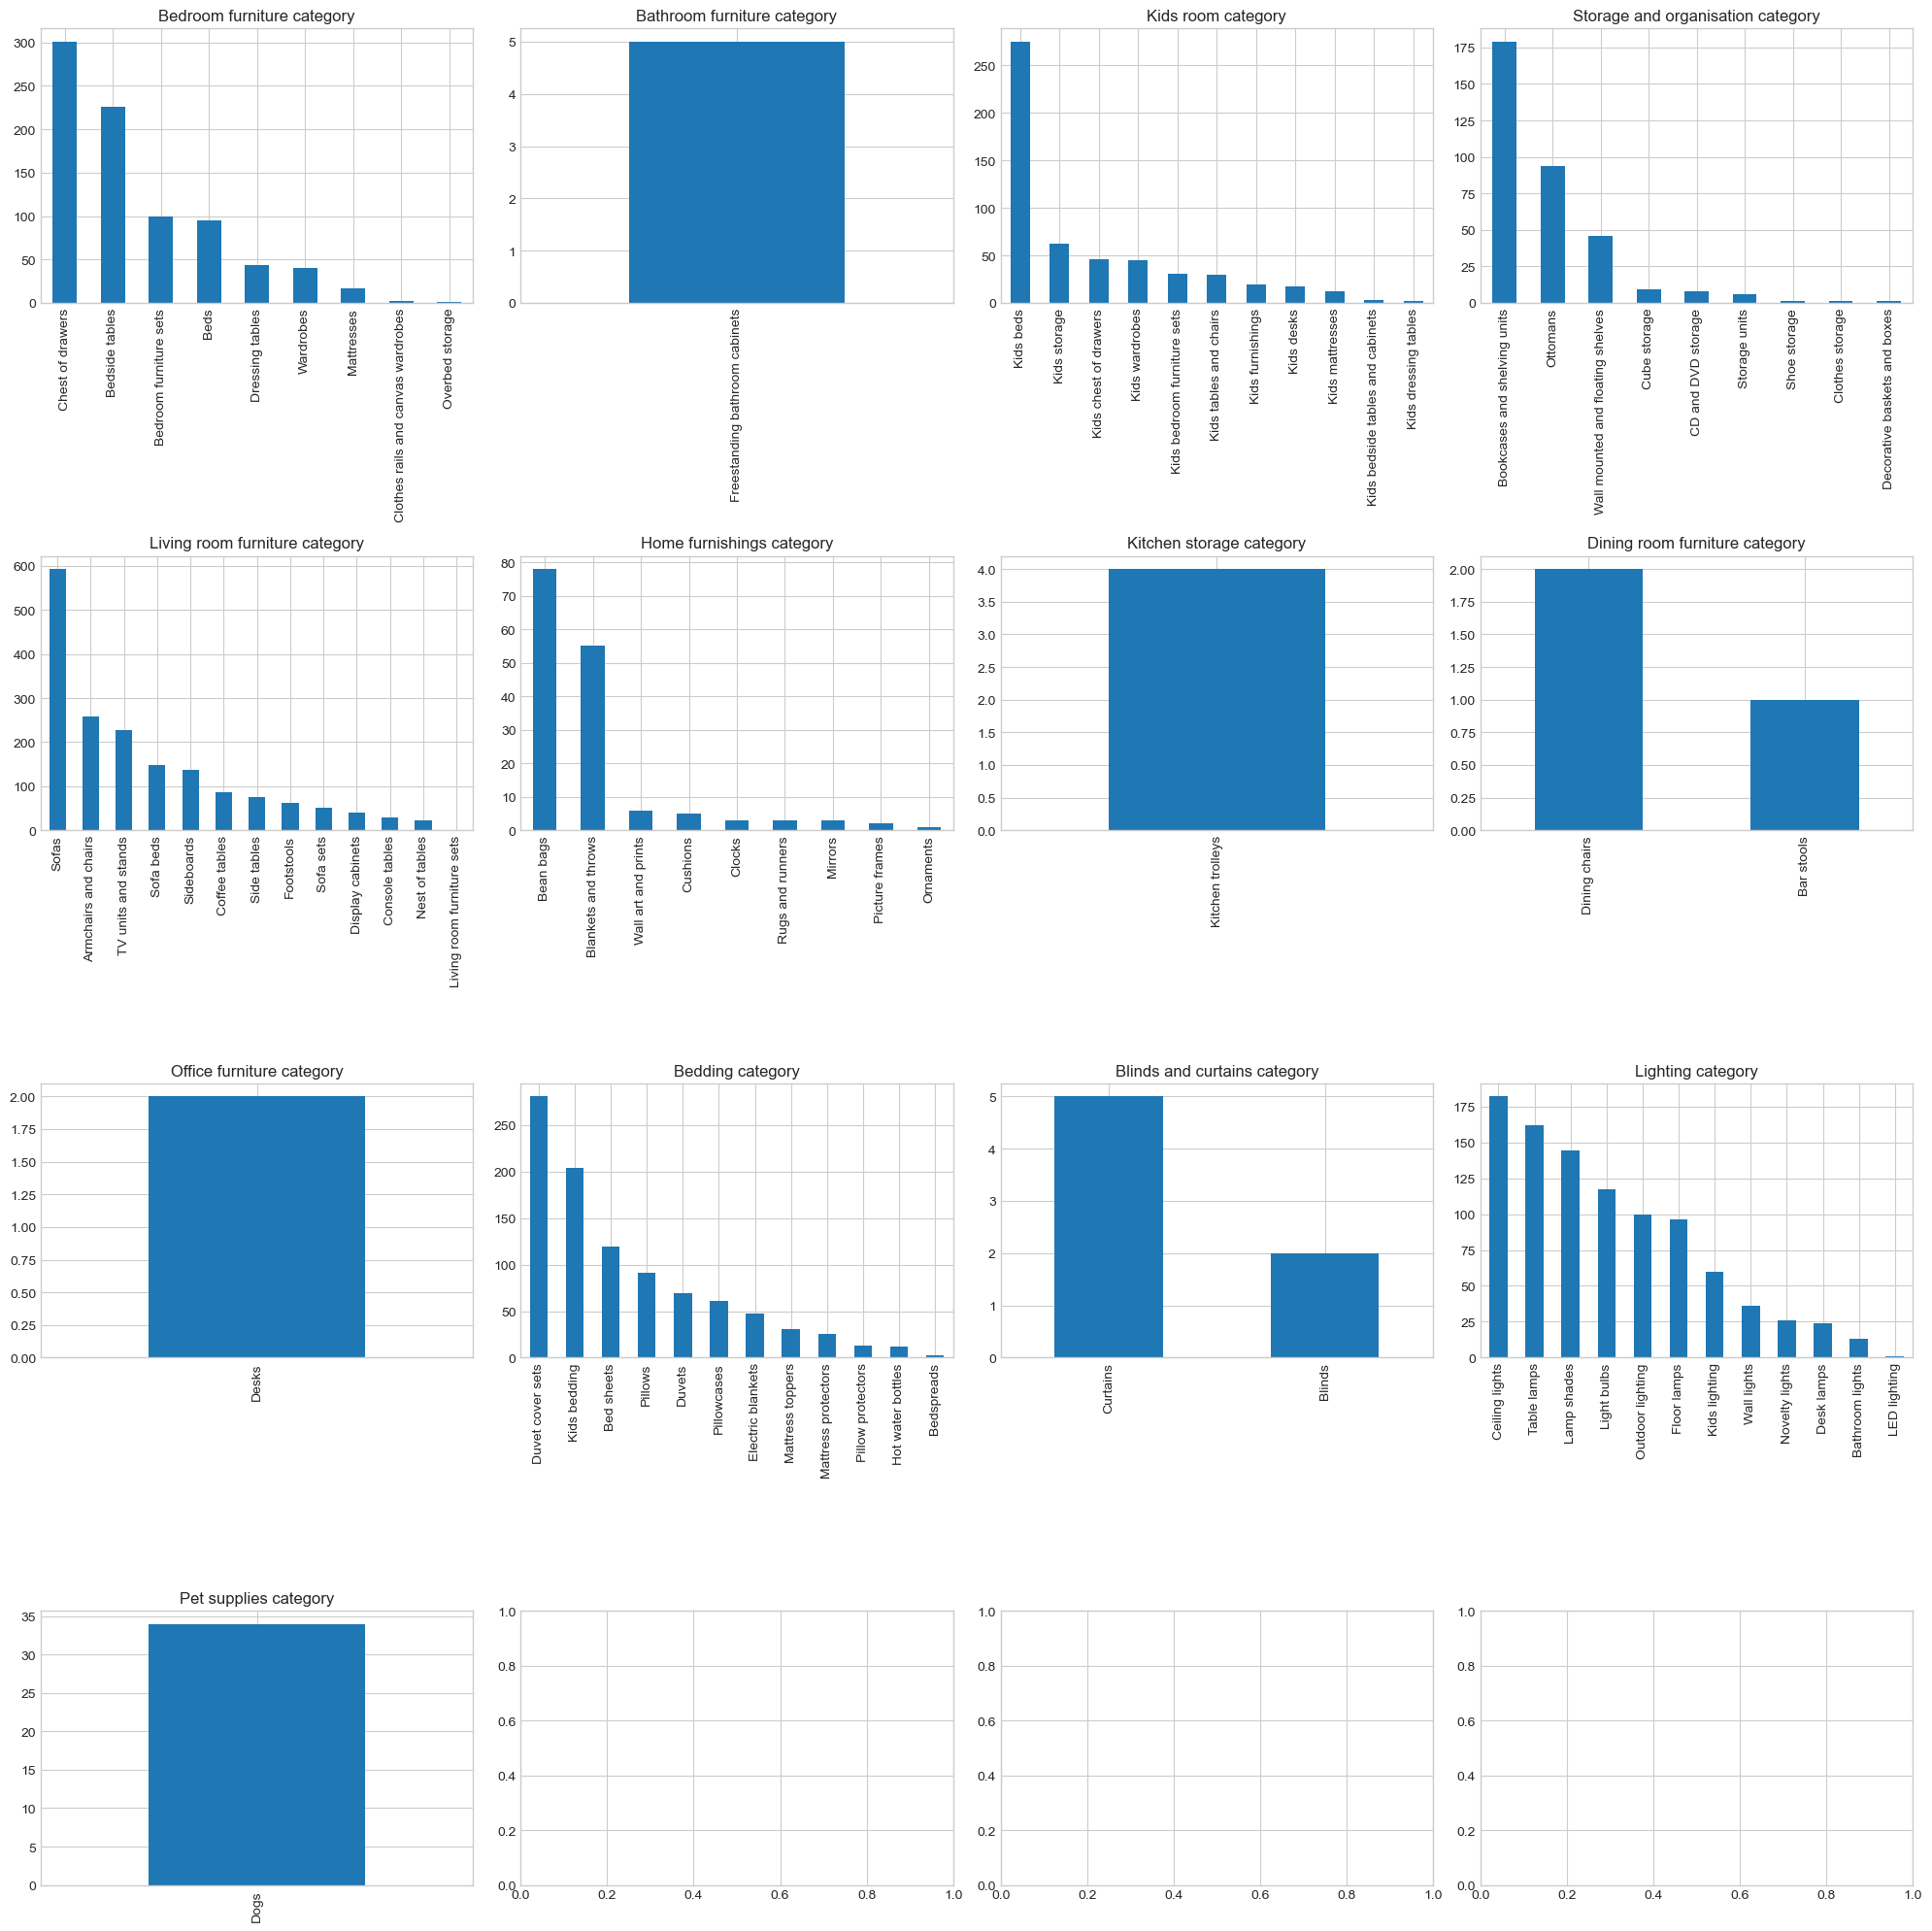

In [18]:
fig, axs = plt.subplots(4,4, figsize=(20,20))
axs = axs.flatten()

i=0
for l in range(len(category)):
    category[l].plot(kind='bar', ax=axs[i], x=category[l].columns[0], title=category[l].columns[0]).\
    set(xlabel=None)
    #axs[i].tick_params(axis='x', rotation=90)
    axs[i].legend().remove()
    i += 1

plt.tight_layout()
plt.show()

In [19]:
#Now we want to keep only the categories with more than 100 units in total

category_100 = []

for i in range(len(category)):
    if category[i]['Product Type'].sum() > 100:
        results = category[i]
        category_100.append(results)

#Comparing to see the difference between the two subsets
print(f" DataFrames without filter = {len(category)}")
print(f" DataFrames with filter = {len(category_100)}")

 DataFrames without filter = 13
 DataFrames with filter = 7


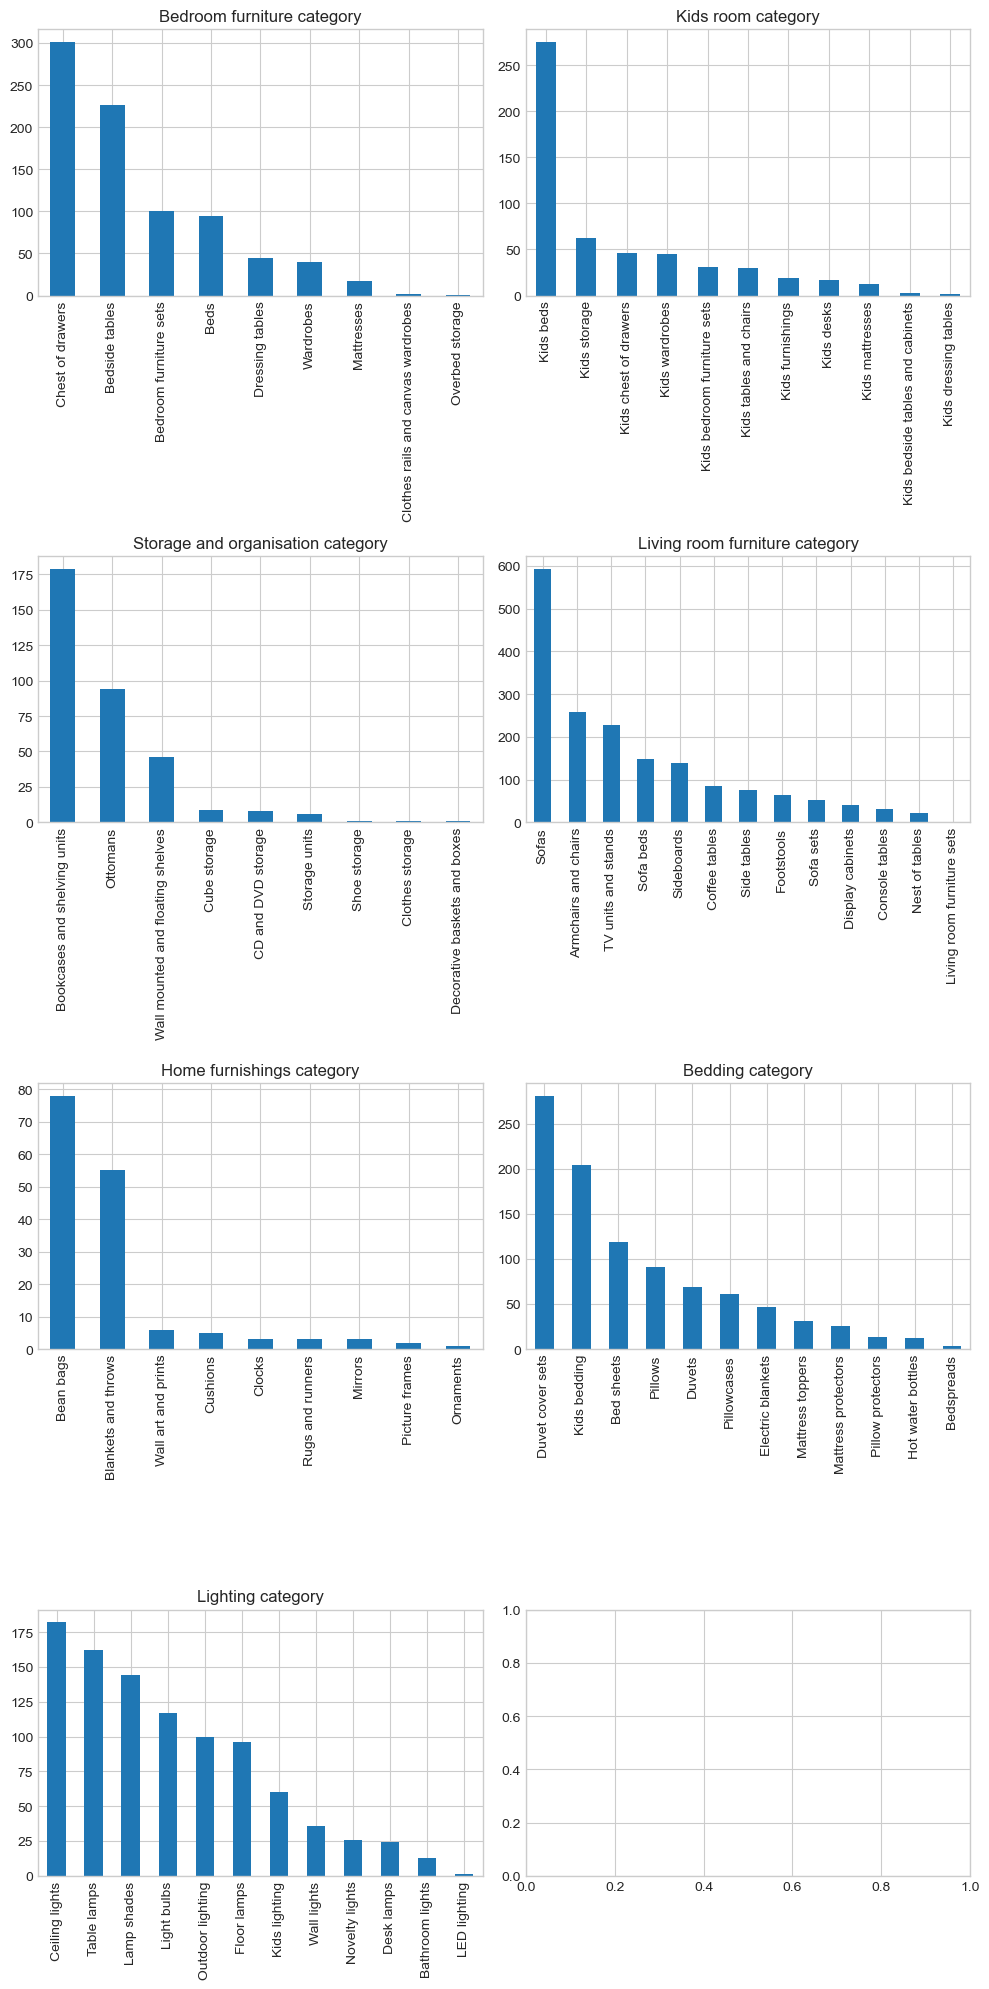

In [20]:
#Plotting the new DF
fig, axs = plt.subplots(4,2, figsize=(10,20))
axs = axs.flatten()

i=0
for l in range(len(category_100)):
    category_100[l].plot(kind='bar', ax=axs[i], x=category_100[l].columns[0], title=category_100[l].columns[0]).\
    set(xlabel=None)
    #axs[i].tick_params(axis='x', rotation=90)
    axs[i].legend().remove()
    i += 1

plt.tight_layout()
plt.show()

In [21]:
# We will create an standar visualizer for each category, trying to import this information to a report for a company
#The idea is to create a standar code for this process to use a pipeline to automatize this information and grant insights

#Searching the category with most obejcts
living_room = category_100[3]
living_room_total = living_room['Product Type'].sum()
print(f'Total objects in Living Room category = {living_room_total}')
living_room

Total objects in Living Room category = 1737


,Living room furniture category,Product Type
0,Sofas,593
1,Armchairs and chairs,259
2,TV units and stands,228
3,Sofa beds,148
4,Sideboards,138
5,Coffee tables,86
6,Side tables,76
7,Footstools,63
8,Sofa sets,52
9,Display cabinets,41


In [22]:
living_room_df = home_furniture[home_furniture['Sub-Category'] == 'Living room furniture']
living_room_df

,Category,Sub-Category,Product Type,Product Line Item,Product Price
450,Home and furniture,Living room furniture,Side tables,Habitat Sylvie Side Table - Mirrored,83.3
467,Home and furniture,Living room furniture,Side tables,Frank Olsen Wireless Charging Side Table - Gre...,155.0
499,Home and furniture,Living room furniture,Side tables,Frank Olsen Elevate Lamp Table - Grey,200.0
500,Home and furniture,Living room furniture,Side tables,Frank Olsen Elevate Lamp Table - Grey,200.0
501,Home and furniture,Living room furniture,Side tables,Frank Olsen Elevate Smart Lamp Table - White,200.0
...,...,...,...,...,...
3235,Home and furniture,Living room furniture,Sofa beds,Habitat Kids Grey Stars Chair Bed,85.0
3236,Home and furniture,Living room furniture,Footstools,Habitat Elton the Elephant Kids Stool,65.0
3521,Home and furniture,Living room furniture,Footstools,Kaikoo Dottie Cotton Knitted Pod Footstool - Y...,55.0
3523,Home and furniture,Living room furniture,Footstools,Kaikoo Gentry Wool Pouffe - White,70.0


In [32]:
#Now we want to visualize important information

living_room_products = []

for i in living_room_df['Product Type'].unique():
    results = living_room_df[living_room_df['Product Type'] == i]
    results = results.loc[:,['Product Type', 'Product Line Item', 'Product Price']]
    living_room_products.append(results)
#We will analyze how the Product Type column is composed 
living_room_products[0]


,Product Type,Product Line Item,Product Price
450,Side tables,Habitat Sylvie Side Table - Mirrored,83.3
467,Side tables,Frank Olsen Wireless Charging Side Table - Gre...,155.0
499,Side tables,Frank Olsen Elevate Lamp Table - Grey,200.0
500,Side tables,Frank Olsen Elevate Lamp Table - Grey,200.0
501,Side tables,Frank Olsen Elevate Smart Lamp Table - White,200.0
...,...,...,...
2179,Side tables,GFW Presto Side Table - White & Oak,60.0
2180,Side tables,Frank Olsen Elevate Lamp Table - Grey,200.0
2181,Side tables,Lloyd Pascal Rustica Side Table - Light Wood,100.0
2182,Side tables,Lloyd Pascal Radiance Side Table - Black & Gold,100.0


In [40]:
#Starting with the Side Tables product
living_room_products[0]['Product Line Item'].unique() #We see that there are multiple items in here

array(['Habitat Sylvie Side Table - Mirrored',
       'Frank Olsen Wireless Charging Side Table - Grey & White',
       'Frank Olsen Elevate Lamp Table - Grey',
       'Frank Olsen Elevate Smart Lamp Table - White',
       'Habitat Skandi Storage Side Table - Grey',
       'Habitat Sona Storage Side Table - Silver',
       'Habitat Sona Storage Side Table - Brass',
       'Habitat Mid Century Side Table - Walnut',
       'Habitat Single Folding Tray Table - Natural',
       'Argos Home New Verona Side Table - Light Wood Effect',
       'Habitat Loft Living C Shape End Table - Black',
       'Habitat End Table - Oak Effect', 'Habitat End Table - Black',
       'Habitat End Table - White',
       'Habitat Airo Metal Folding Table - Blue',
       'Habitat Airo Metal Folding Table - Black',
       'Habitat Airo Metal Folding Table - White',
       'Habitat Hazel Natural Rattan Side Table',
       'Habitat Drew Low Side Table - Bamboo',
       'Habitat Kayleigh Marble Side Table',
       'H

In [52]:
#Here we see the range of prices, so it will be a good idea to create groups based in a range of price
living_room_products[0].groupby('Product Price')[['Product Type']].count().sort_values(by='Product Price', ascending=False)

,Product Type
Product Price,
200.0,4
155.0,2
120.0,4
100.0,2
95.0,2
90.0,2
85.0,4
83.3,2
80.0,4


In [118]:
living_room_range = []


for i in range(len(living_room_products)):
    results_1 = living_room_products[i][(living_room_products[i]['Product Price'] >=0) & (living_room_products[i]['Product Price'] <= 50)]
    results_2 = living_room_products[i][(living_room_products[i]['Product Price'] >50) & (living_room_products[i]['Product Price'] <= 100)]
    results_3 = living_room_products[i][(living_room_products[i]['Product Price'] >100)]
    living_room_range.append(results_1)
    living_room_range.append(results_2)
    living_room_range.append(results_3)

living_room_range[1]

,Product Type,Product Line Item,Product Price
450,Side tables,Habitat Sylvie Side Table - Mirrored,83.3
2108,Side tables,Habitat Skandi Storage Side Table - Grey,56.0
2112,Side tables,Habitat Mid Century Side Table - Walnut,75.0
2125,Side tables,Habitat Hazel Natural Rattan Side Table,80.0
2128,Side tables,Habitat Kayleigh Marble Side Table,70.0
2133,Side tables,Habitat Pasadena Side Table - Natural,65.0
2135,Side tables,Habitat Rattan Side Table - Black,56.0
2136,Side tables,GFW Canyon Lamp Table - Oak,54.0
2138,Side tables,GFW Jakarta Cube Side Table - Mango Wood Effect,67.0
2140,Side tables,GFW Lancaster Side Table - Cream,58.0


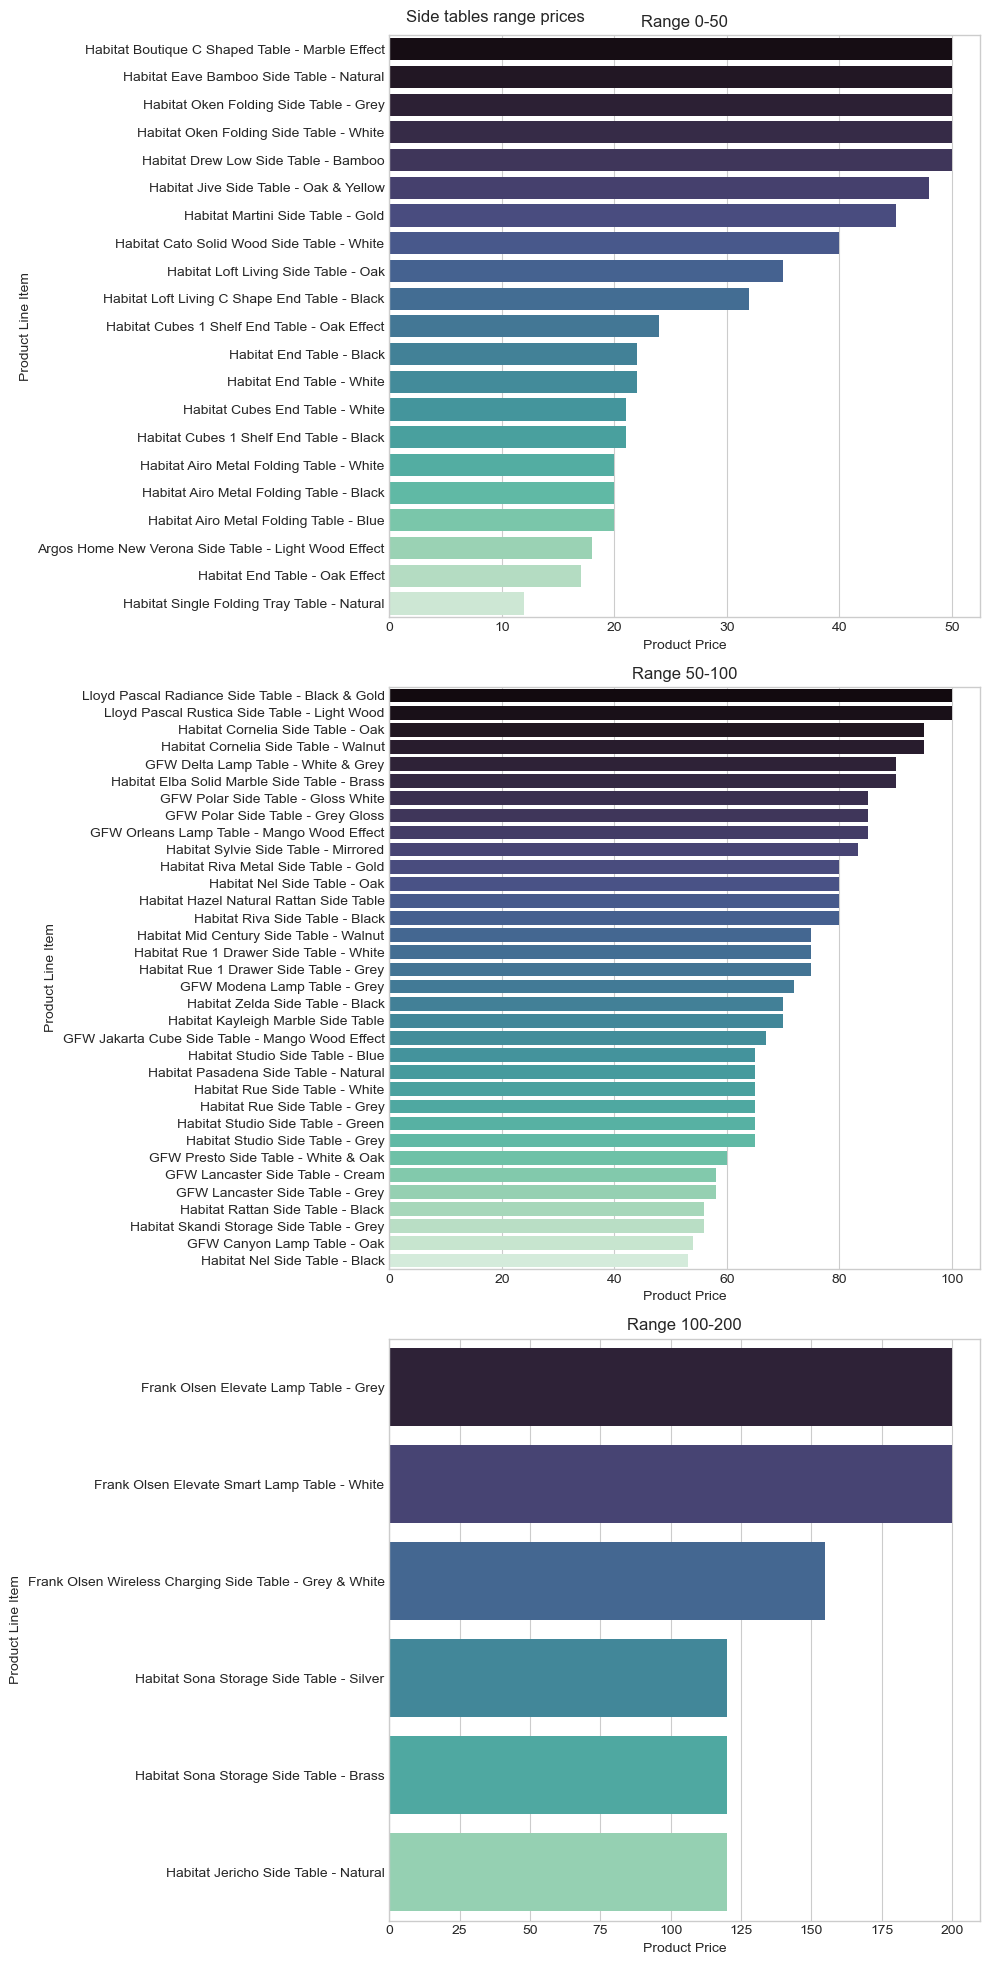

In [133]:
#Plotting the data
sorted_50 = living_room_range[0].sort_values(by='Product Price', ascending=False)
sorted_100 = living_room_range[1].sort_values(by='Product Price', ascending=False)
sorted_200 = living_room_range[2].sort_values(by='Product Price', ascending=False)

fig, axs= plt.subplots(3,1, figsize=(10,20))
sns.barplot(data=sorted_50, y=sorted_50['Product Line Item'], x=sorted_50['Product Price'], palette='mako', ax=axs[0]).set(title='Range 0-50')
sns.barplot(data=sorted_100, y=sorted_100['Product Line Item'], x=sorted_100['Product Price'], palette='mako',ax=axs[1]).set(title='Range 50-100')
sns.barplot(data=sorted_200, y=sorted_200['Product Line Item'], x=sorted_200['Product Price'], palette='mako',ax=axs[2]).set(title='Range 100-200')
plt.suptitle('Side tables range prices')
plt.tight_layout()
plt.show()